In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [143]:
df_3s=pd.read_csv("features_30_sec.csv")
df_3s.shape

(1000, 60)

In [144]:
df_3s.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


Checking for missing values

In [145]:
df_3s.isna().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [146]:
df_3s["label"].value_counts().reset_index()

,index,label
0,blues,100
1,classical,100
2,country,100
3,disco,100
4,hiphop,100
5,jazz,100
6,metal,100
7,pop,100
8,reggae,100
9,rock,100


In [147]:
unique_genres=df_3s["label"].unique()
unique_genres

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [148]:
local_path = r"C:\Users\kowsh\OneDrive\Documents\MSBA Coursework\Advanced ML by Prof Ghosh\Project\Data"
audio_clips = {}
for genre in unique_genres:
    audio_clips[genre] = [clip for clip in os.listdir(f'{local_path}/genres_original/{genre}') if clip.endswith('.wav')]

print(audio_clips)

{'blues': ['blues.00000.wav', 'blues.00001.wav', 'blues.00002.wav', 'blues.00003.wav', 'blues.00004.wav', 'blues.00005.wav', 'blues.00006.wav', 'blues.00007.wav', 'blues.00008.wav', 'blues.00009.wav', 'blues.00010.wav', 'blues.00011.wav', 'blues.00012.wav', 'blues.00013.wav', 'blues.00014.wav', 'blues.00015.wav', 'blues.00016.wav', 'blues.00017.wav', 'blues.00018.wav', 'blues.00019.wav', 'blues.00020.wav', 'blues.00021.wav', 'blues.00022.wav', 'blues.00023.wav', 'blues.00024.wav', 'blues.00025.wav', 'blues.00026.wav', 'blues.00027.wav', 'blues.00028.wav', 'blues.00029.wav', 'blues.00030.wav', 'blues.00031.wav', 'blues.00032.wav', 'blues.00033.wav', 'blues.00034.wav', 'blues.00035.wav', 'blues.00036.wav', 'blues.00037.wav', 'blues.00038.wav', 'blues.00039.wav', 'blues.00040.wav', 'blues.00041.wav', 'blues.00042.wav', 'blues.00043.wav', 'blues.00044.wav', 'blues.00045.wav', 'blues.00046.wav', 'blues.00047.wav', 'blues.00048.wav', 'blues.00049.wav', 'blues.00050.wav', 'blues.00051.wav', '

In [149]:
audio_clips["blues"][0]

'blues.00000.wav'

In [150]:
random_selection ={}
for genre,files  in audio_clips.items():
    random_audio = np.random.choice(files)
    random_selection[genre]=random_audio
random_selection


{'blues': 'blues.00023.wav',
 'classical': 'classical.00068.wav',
 'country': 'country.00081.wav',
 'disco': 'disco.00046.wav',
 'hiphop': 'hiphop.00073.wav',
 'jazz': 'jazz.00087.wav',
 'metal': 'metal.00085.wav',
 'pop': 'pop.00073.wav',
 'reggae': 'reggae.00089.wav',
 'rock': 'rock.00076.wav'}

In [151]:
import librosa
audios={}
rates={}
for genre in random_selection.keys():
    audio_path = f'{local_path}/genres_original/{genre}/{random_selection[genre]}'
    data, sr = librosa.load(audio_path, sr=None)
    audios[genre] = data
    rates[f"{genre}"]=sr

In [152]:
from IPython.display import Audio
Audio(audios["blues"],rate=rates["blues"])

In [153]:
Audio(audios["pop"],rate=rates["pop"])

In [154]:
df_3s.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [155]:
from sklearn.model_selection import train_test_split,cross_val_score
X=df_3s.drop(["filename","label"],axis=1)
y=df_3s["label"]

In [156]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
y_dc=LabelEncoder().fit_transform(y)
X_dc=StandardScaler().fit_transform(X)

In [157]:
X_train, X_test,y_train,y_test=train_test_split(X_dc,y_dc,test_size=0.2,random_state=42,stratify=y_dc)

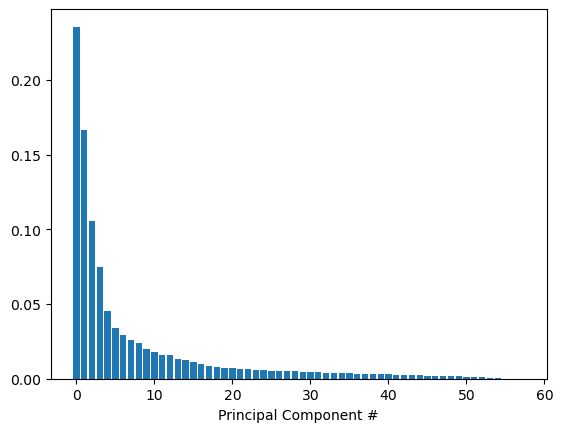

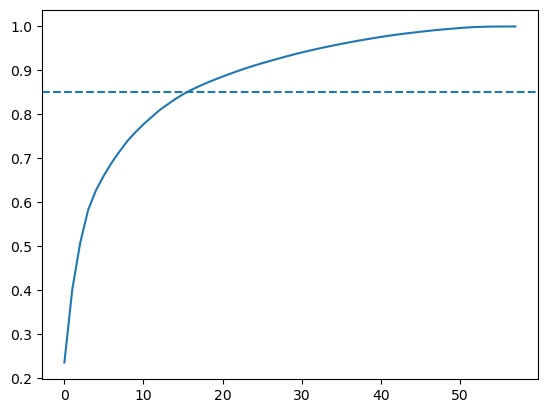

In [158]:
from sklearn.decomposition import PCA

pca = PCA(random_state=17).fit(X_dc)
exp_variance = pca.explained_variance_ratio_


fig, ax = plt.subplots()
ax.bar(range(len(exp_variance)), exp_variance)
ax.set_xlabel('Principal Component #')

import numpy as np

cum_exp_variance = np.cumsum(exp_variance)

fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.85, linestyle='--')

In [159]:
pca = PCA(n_components=17,random_state=17) 

train_pca = pca.fit_transform(X_train)
 
test_pca = pca.transform(X_test)

In [160]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([80, 80, 80, 80, 80, 80, 80, 80, 80, 80], dtype=int64))

In [161]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20], dtype=int64))

In [162]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def cross_val_svm(kernel,C_list,random_state):
    best_score = -np.inf #initializing to a very small score
    for C in C_list:
        svmMod=SVC(C=C,kernel=kernel,random_state=random_state)
        score=cross_val_score(svmMod,train_pca,y_train,cv=10)
        score=score.mean()
        if score>best_score:
            best_score=score
            best_c=C
    finMod = SVC(C=best_c,kernel=kernel,random_state=random_state)
    finMod.fit(train_pca,y_train)
    return finMod,best_c


In [163]:
C_space = [0.1, 1, 10, 100]
kernels = ['linear', 'poly', 'rbf']
svm_accuracy=pd.DataFrame(columns=["Kernel","Best C","Test Accuracy"])
predictions={}

for kernel in kernels:

  model, best_c = cross_val_svm(kernel, C_space, 42)

  y_pred = model.predict(test_pca)
  predictions[kernel]=y_pred
  accuracy = accuracy_score(y_pred,y_test)
  svm_accuracy.loc[len(svm_accuracy)]=[kernel,best_c,accuracy]

In [164]:
svm_accuracy.loc[:,"Test Accuracy"]=svm_accuracy.loc[:,"Test Accuracy"]*100

In [165]:
svm_accuracy

,Kernel,Best C,Test Accuracy
0,linear,0.1,67.5
1,poly,10.0,70.5
2,rbf,10.0,68.5


<Axes: xlabel='Kernel'>

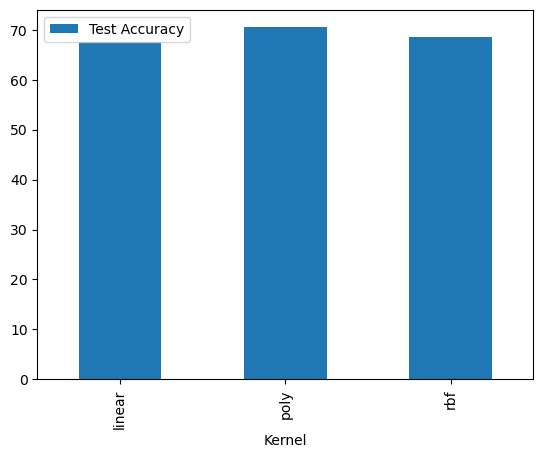

In [166]:
svm_accuracy.plot("Kernel","Test Accuracy",kind="bar")

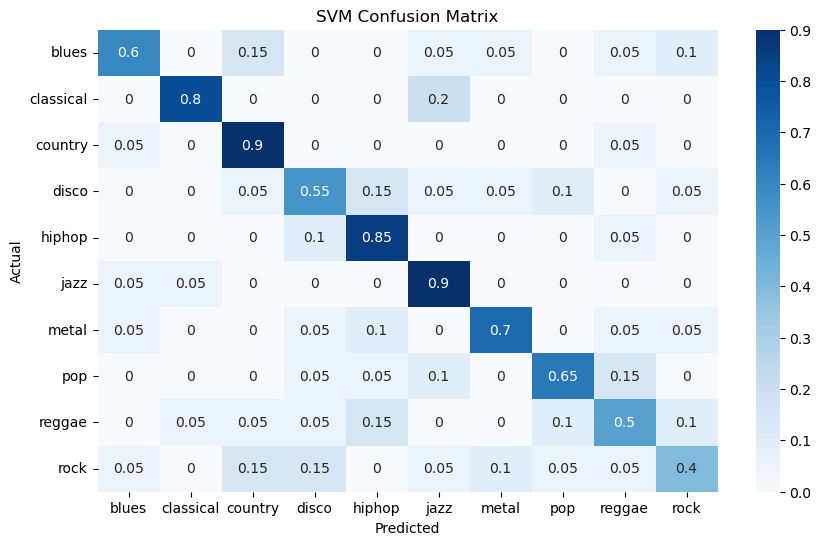

In [167]:
from sklearn.metrics import confusion_matrix
svm_cfmat=confusion_matrix(y_test,predictions['rbf'],normalize='true')

import seaborn as sns
import seaborn as sns
svm_cfmat=np.round(svm_cfmat,2)
plt.figure(figsize=(10,6))
sns.heatmap(svm_cfmat, annot=True, cmap='Blues', xticklabels=unique_genres, yticklabels=unique_genres)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

In [168]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [10,20, 50,100,120,150],
              "max_features": [1,5,10,20,40,50, "sqrt"],
              "criterion": ['gini','entropy'],
              "random_state": [42]}

cvMod=RandomForestClassifier()

gridsearch=GridSearchCV(cvMod,param_grid=param_grid)

gridsearch.fit(train_pca, y_train)

rfMod=gridsearch.best_estimator_

rfMod.fit(train_pca, y_train)

y_pred_rf=rfMod.predict(test_pca)

In [169]:
gridsearch.best_params_

{'criterion': 'entropy',
 'max_features': 'sqrt',
 'n_estimators': 120,
 'random_state': 42}

In [170]:
from sklearn.metrics import classification_report
results_rf=classification_report(y_test,y_pred_rf,target_names=unique_genres)

print(results_rf)


              precision    recall  f1-score   support

       blues       0.69      0.55      0.61        20
   classical       0.90      0.90      0.90        20
     country       0.62      0.75      0.68        20
       disco       0.53      0.45      0.49        20
      hiphop       0.67      0.80      0.73        20
        jazz       0.71      0.75      0.73        20
       metal       0.67      0.80      0.73        20
         pop       0.84      0.80      0.82        20
      reggae       0.79      0.75      0.77        20
        rock       0.69      0.55      0.61        20

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200



In [171]:
rf_accu=accuracy_score(y_test,y_pred_rf)*100
print(f'Random Forest Test Accuracy = {rf_accu}%')

Random Forest Test Accuracy = 71.0%


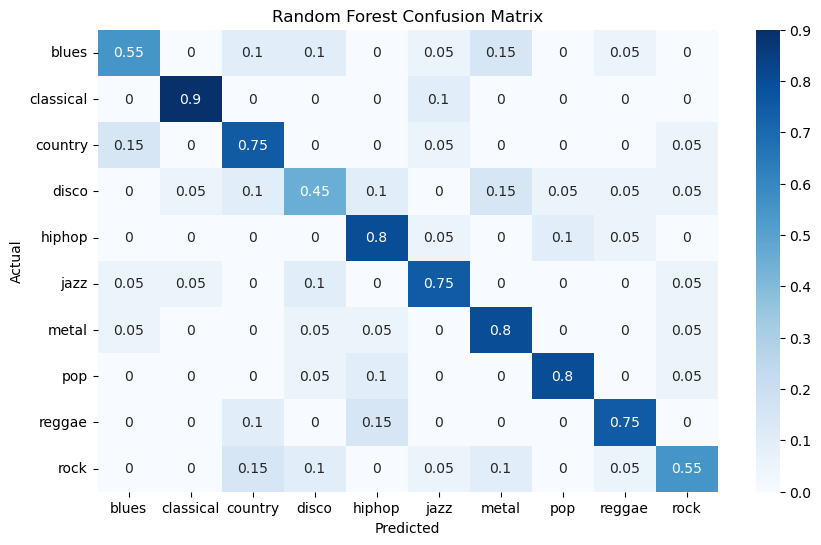

In [172]:

RF_cfmat=confusion_matrix(y_test,y_pred_rf,normalize='true')

import seaborn as sns
import seaborn as sns
svm_cfmat=np.round(svm_cfmat,2)
plt.figure(figsize=(10,6))
sns.heatmap(RF_cfmat, annot=True, cmap='Blues', xticklabels=unique_genres, yticklabels=unique_genres)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()